<h1><center>LAB 3 - Linear Algebra </center></h1>

## NAME: Anastasia Horne $\hspace{2.5in}$                                 STUDENT NUMBER: 10867499

Note: Because of random generation some of the plots will change when you rerun the code making the analyis a little off. I attempted to set random seeds, but in some places they do not seem to be working. For example in Q1 you can get the original/analyzed results by rerunning that section once or twice. However in Q2, no matter how many times I run it I do not get perfectly reproducable results.

In [87]:
#Import Libraries
from time import time
import numpy as np
import matplotlib.pyplot as plt

# Q1: matrix multiplication

Test the matrix multiplication function in the course notebook. For both direct implement and vectorized implement, plot how the calculation time increase with matrix size N. Can you manually fit a $cN^3$ curve to the calculation time? What's the value of c for the direct implement and vectorized implement?

In [88]:
#direct implement function definition
def dirImp(N, M, A, B, C):
    tic = time()
    for i in range(M):
        for j in range(M):
            for k in range(N):
                C[i,j] += A[i,k]*B[k,j]
    toc = time()
    time_elapsed = toc - tic
    return time_elapsed

In [89]:
#vectorized implement function definiton
def vectImp(N, M, A, B, C):
    tic = time()
    for i in range(M):
        for j in range(M):
            C[i,j] = np.sum(A[i,:]*B[:,j])
    toc = time()
    time_elapsed = toc - tic
    return time_elapsed

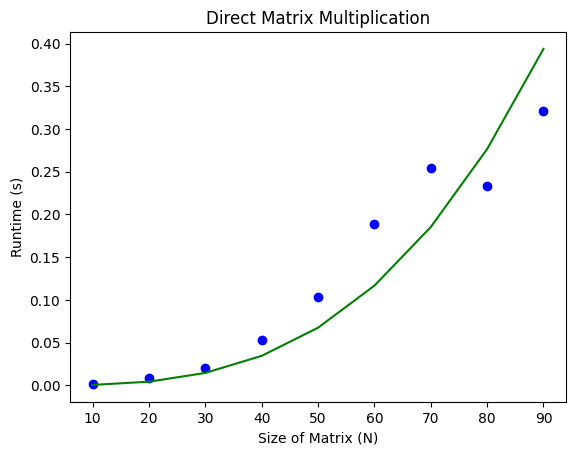

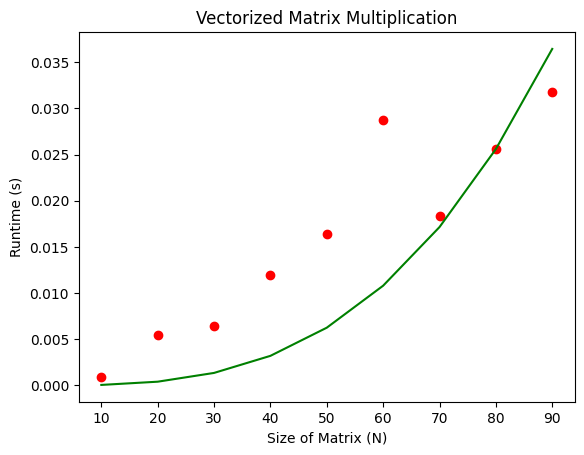

In [117]:
# Python realization of matrix multiplication

N= np.arange(10, 100, 10)
np.random.seed(9)
timeDir= []
timeVect= []
for n in N:
    A = np.random.rand(n,n)
    B = np.random.rand(n,n)
    C = np.zeros((n,n))

    timeDir.append(dirImp(n, n, A, B, C))
    C = np.zeros((n,n))
    timeVect.append(vectImp(n, n, A, B, C))

#plot the N value versus time
plt.figure(6)
plt.scatter(N, timeDir, label="Direct Implementation", color="blue")
#cN^3
plt.plot(N, 0.00000054*N**3, color="green")
plt.title("Direct Matrix Multiplication")
plt.xlabel("Size of Matrix (N)")
plt.ylabel("Runtime (s)")
plt.show()

plt.figure(6)
plt.scatter(N, timeVect, label="Vector Implementation", color="red")
#cN^3
plt.plot(N, 0.00000005*N**3, color="green")
plt.title("Vectorized Matrix Multiplication")
plt.xlabel("Size of Matrix (N)")
plt.ylabel("Runtime (s)")
plt.show()


We can manually fit a $cN^3$ curve because the above scatterplots show a postive cubic-like trend as $N$ increases. For **direct implementation**, $\boxed{c=5.4 \times 10^{-7}}$. For **vectorized implementation** $\boxed{c=5 \times 10^{-8}}$.

# Q2: banded matrix

Modify the Gaussian Elimination function to solve the problem $Ax=y$, where $A$ is a banded square matrix with form:
$$ A= \left[\begin{matrix}
b&c&0&0&...&0\\
a&b&c&0&...&0\\
0&a&b&c&...&0\\
\vdots & \vdots &\vdots &\vdots &\vdots &\vdots \\
0&0&0&0&...&b
\end{matrix}\right]
$$
test the program using randomly generated matrix. Plot how computation time increase with matrix size N. What's the computational cost here?

Text(0, 0.5, 'Runtime (s)')

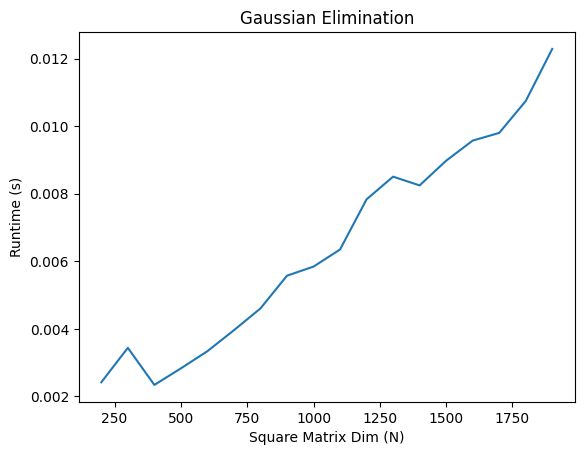

In [132]:
def Gauss_elimination_banded(N, print_process=False):
    #create our random A matrix:
        #note: I followed the pattern above, only using three values a=num[2], b=num[0], c=num[1]
        #also, I researched banded matrices and this would be a symmetric matrix with bandwidth=1
    A = np.zeros((N, N))
    np.random.seed(22)
    num = np.random.rand(3)
    for i in range(N):
        # Fill the main diagonal
        A[i, i] = num[0]
        # Fill the upper band
        if i < N - 1:
            A[i, i + 1] = num[1]
        # Fill the lower band
        if i > 0:
            A[i, i - 1] = num[2]
    np.random.seed(22)
    y = np.random.rand(N)
    n = A.shape[0]
    Ay = np.hstack((A, y.reshape(-1, 1)))  # Create augmented matrix

    tic=time()
    # Gauss Elimination for banded matrix
    for k in range(n - 1):
        # Limit row operations within the bandwidth
        for i in range(k + 1, min(k + 2, n)):
            factor = Ay[i][k] / Ay[k][k]
            Ay[i, k:min(k + 2, n)] -= factor * Ay[k, k:min(k + 2, n)]
            y[i] -= factor * y[k]

    # Back substitution
    x = np.zeros(n)
    for i in range(n - 1, -1, -1):
        x[i] = (y[i] - Ay[i, i + 1:min(i + 2, n)] @ x[i + 1:min(i + 2, n)]) / Ay[i][i]
    toc=time()
    return (toc-tic)

#run trials with different sizes of N
np.random.seed(22)
N2= np.arange(200, 2000, 100)
timeGauss= []
for N in N2:
    timeGauss.append(Gauss_elimination_banded(N))

plt.plot(N2, timeGauss)
plt.title("Gaussian Elimination")
plt.xlabel("Square Matrix Dim (N)")
plt.ylabel("Runtime (s)")

The computational cost is $O(N)$. Our banded matrix only has non-zero values on the main diagonal and the diagonals directly below and above it. What this means is that for gaussian elimnation to transform $\tilde{A}$ into a triangular matrix we only need to transform the diagonal below the main diagonal to all zeros. Specifically, the original matrix $A$ only has (at max) three non-zero values per column, and since we are only interested in producing a lower or upper triangular matrix, we can ignore one of these values (ex. upper diagonal values). So for each point along the main diagonal (pivot), we only need to reduce/transform the value in the spot directly below it, so we only perform operations on the row directly below our pivot equation. So we only need to perform $N-1$ operations during our forward loop and $N-1$ during our backwards loops. Meaning total complexity is $O(N-1) + O(N-1) = \boxed{O(N)}$.   

We see this in the plot above. The plot appears to have a postive linear trend. Meaning as $N$ increases for our matrix of size $N \times N$, the run time of gaussian elimination increases proportionally. It is interesting to note that the plot is not smooth, this could be due to the randomness of our matrices $A$ and $y$, and the fact that our time range is very small.   

# Q3: Implement LU-Factorization in Python
Write separate functions for LU factorization and for back/forward substitution. Within the LU factorization function, you are not allowed to create new matrices for L and U, but to replace the element of input A matrix to save memory consumption.

Your output matrix should have the following format:
$$
\left[
\begin{matrix}
u_{11} &u_{12}  &u_{13}  &...  &u_{1n} \\
m_{21} & u_{22}  &u_{23}  &...  &u_{2n} \\
m_{31} &m_{32}  &u_{33}  &...  &u_{3n} \\
\vdots &\vdots  &\vdots  &\vdots  &\vdots \\
m_{n1} &m_{n2}  &m_{n3}  &...  &u_{nn}
\end{matrix}
\right]
$$

Outside the LU factorization function, you can desample this integrated matrix into regular LU matrices and perform the forward and backward substitution.

$$
A = LU =
\left[
\begin{matrix}
1 & 0 & 0 & ... & 0\\
m_{21} & 1 & 0  &...  &0 \\
m_{31} &m_{32}  &1  &...  &0 \\
\vdots &\vdots  &\vdots  &\vdots  &\vdots \\
m_{n1} &m_{n2}  &m_{n3}  &...  &1
\end{matrix}
\right]
\left[
\begin{matrix}
u_{11} &u_{12}  &u_{13}  &...  &u_{1n} \\
0 &u_{22}  &u_{23}  &...  &u_{2n} \\
0 &0  &u_{33}  &...  &u_{3n} \\
\vdots &\vdots  &\vdots  &\vdots  &\vdots \\
0 &0  &0  &...  &u_{nn}
\end{matrix}
\right]
$$

Verify your results with Python package.


In [92]:
import numpy as np
import sympy as sp
#LU Factorizaion
#note, this technically works for a square or rectangular matrix (I wasn't sure what we had to do)
def fun(A):
    #an N x M matrix
    N, M= A.shape

    #row one (or zero for 0indexx) stays the same
    #replace the first column of A with the m_j1 values
    for j in range(1, N): #iter through rows
        A[j][0] =  A[j][0] / A[0][0]

   #iterate over the entire internal matrix (that is i,j for i,j>1)
    for j in range(1, min(N,M)):

        #solving row first (we need to solve for the u vals first)
        for k in range(j, M):
            sum=0
            #sum from s=0 (0 indexing) to j-1
            for s in range(j):
                sum+= A[j][s] * A[s][k]
            A[j][k]=A[j][k] - sum
        #solving for column values
        for l in range(j, N):
            #if we are on the main diag. DO NOT convert to 1, this messes up the bottom corner of LU, just skip the value
            if j==l:
                continue
            else:
                sum=0
                #sum from s=0 (0 indexing) to j-1
                for s in range(j):
                    sum+= A[l][s] * A[s][j]
                A[l][j] = (A[l][j] - sum) / A[j][j]

    return A

#Example Application, using examples found online
A1 = sp.Matrix([[1, 2, 0, 2],[1, 3, 2, 1],[2, 3, 4, 0]])
A2 = sp.Matrix([[2, -1, -2], [-4, 6, 3], [-4, -2, 8]])
A3 =sp.Matrix([[3,-7,-2,2], [-3,5,1,0], [6, -4, 0, -5], [-9,5,-5,12]])
As=[A1, A2, A3]

#test to make sure factorization is accurate on 3 A's, the _Simple() returns it in the form we calculated it in
#the link for documentation is at the bottom after the test print statement
testSum=0
for A in As:
    LU_true, _ = A.LUdecomposition_Simple()
    LU_mine=fun(np.array(A))
    if np.array_equal(LU_true, LU_mine):
        testSum+=1
print(testSum, "out of", len(As), "matrices are calculated correctly.")
#https://docs.sympy.org/latest/modules/matrices/matrices.html#sympy.matrices.matrixbase.MatrixBase.LUdecomposition_Simple

3 out of 3 matrices are calculated correctly.


In [93]:
#backward/forward substitution (square only)

#note: performing forward and backward for rectangular doesn't work. I'm assuming the initialization of A as a 3x3 matrix in the base code means
#I can use a 3x3 to test

#forward substitution
def forward_Sub(A,b):
    n = A.shape[0]
    y = np.zeros(n)  # Initialize the solution vector
    for k in range(n):
        # Calculate the sum of known y values
        sum_ly = np.sum(A[k, :k] * y[:k])  # Only sum up to the k-th index
        # Solve for y[k]
        y[k] = (b[k] - sum_ly) / A[k, k]
    return y

def backward_Sub(A, y):
    N = A.shape[0]
    x = np.zeros(N)  # Initialize solution vector
    x[N - 1] = y[N - 1] / A[N - 1, N - 1]
    for k in range(N - 2, -1, -1):
        # Calculate the sum of known x values
        sum_ax = 0
        for j in range(k + 1, N):
            sum_ax += A[k, j] * x[j]
        # Solve for x[k]
        x[k] = (y[k] - sum_ax) / A[k, k]
    return x

In [94]:
def decoupleLU(LU):
    #decouple L and U
    N= LU.shape[0]
    L = np.zeros((N, N))
    U = np.zeros((N, N))

    for j in range(N):
        for k in range(N):
            if j > k: #row is greater than column (lower triangular part of LU)
                L[j][k] = LU[j][k]
                U[j][k] =0
            elif j == k: #row=column, diagonal
                L[j][k] = 1
                U[j][k] = LU[j][k]
            else: #row less than column (upper triangle)
                U[j][k] = LU[j][k]
                L[j][k] = 0
    return L, U

In [95]:
from mpmath import *
#Test 1
A_test1 = sp.Matrix([[7, -2, 1],[14, -7, -3],[-7, 11, 18]])
b_test1= (12, 17, 5)
LU_mine_test1 = fun(np.array(A_test1))
L_test1, U_test1 = decoupleLU(LU_mine_test1)

y_test1= forward_Sub(L_test1, b_test1)
x_mine_test1= backward_Sub(U_test1,y_test1)

x_true_test1 = lu_solve(A_test1,b_test1)
print("---------- Test 1 ----------")
print("My Solution:\n", x_mine_test1)
print("Actual Solution:\n",x_true_test1)

#Test 2
A_test2 = sp.Matrix([[3,-7,-2,2], [-3,5,1,0], [6, -4, 0, -5], [-9,5,-5,12]])
b_test2= (-9, 5, 7, 11)
LU_mine_test2 = fun(np.array(A_test2))
L_test2, U_test2 = decoupleLU(LU_mine_test2)

y_test2= forward_Sub(L_test2, b_test2)
x_mine_test2= backward_Sub(U_test2,y_test2)

x_true_test2 = lu_solve(A_test2,b_test2)
print("---------- Test 2 ----------")
print("My Solution:\n", x_mine_test2)
print("Actual Solution:\n",x_true_test2)


---------- Test 1 ----------
My Solution:
 [ 3.  4. -1.]
Actual Solution:
 [ 3.0]
[ 4.0]
[-1.0]
---------- Test 2 ----------
My Solution:
 [ 3.  4. -6. -1.]
Actual Solution:
 [ 3.0]
[ 4.0]
[-6.0]
[-1.0]


We see that for two diffrent square matrices, one $N=4$ and the other $N=3$, my solution for the problem $Ax=b$, found using my implementation of LU-factorization **matches** the true solution found using lu_solve.

# Q4: Convert LU-Factorization code to C (GPGN536 Only)

Convert the LU-factorization code to C. Use python code to verify the result. Compare the computation performance between C and python.

In [96]:
%%writefile LUfactorization_c.c

#include <stdio.h>
#include <stdlib.h>
#include <math.h>
#include <time.h>

// LU code
double** lu_factorization(double **A, int N, int M) {
    for (int j = 1; j < N; j++) {
        A[j][0] /= A[0][0];  // Normalize the first column
    }

    for (int j = 1; j < (N < M ? N : M); j++) {
        // Solving for U values
        for (int k = j; k < M; k++) {
            double sum = 0.0;
            for (int s = 0; s < j; s++) {
                sum += A[j][s] * A[s][k];
            }
            A[j][k] -= sum;
        }

        // Solving for L values
        for (int l = j; l < N; l++) {
            if (j == l) continue;  // Skip diagonal
            double sum = 0.0;
            for (int s = 0; s < j; s++) {
                sum += A[l][s] * A[s][j];
            }
            A[l][j] = (A[l][j] - sum) / A[j][j];
        }
    }
    return A;
}

// Forward substitution
double* forward_substitution(double **A, double *b, int n) {
    double *y = (double*)malloc(n * sizeof(double));  // Initialize the solution vector
    for (int k = 0; k < n; k++) {
        double sum_ly = 0.0;
        for (int j = 0; j < k; j++) {
            sum_ly += A[k][j] * y[j];  // Only sum up to the k-th index
        }
        y[k] = (b[k] - sum_ly) / A[k][k];
    }
    return y;
}

// Backward substitution
double* backward_substitution(double **A, double *y, int N) {
    double *x = (double*)malloc(N * sizeof(double));  // Initialize the solution vector
    x[N - 1] = y[N - 1] / A[N - 1][N - 1];  // Start with the last equation

    for (int k = N - 2; k >= 0; k--) {
        double sum_ax = 0.0;
        for (int j = k + 1; j < N; j++) {
            sum_ax += A[k][j] * x[j];
        }
        x[k] = (y[k] - sum_ax) / A[k][k];
    }
    return x;
}

// Decouples L and U from LU matrix
void decoupleLU(double **LU, int N, double **L, double **U) {
    for (int j = 0; j < N; j++) {
        for (int k = 0; k < N; k++) {
            if (j > k) {  // Lower triangular part
                L[j][k] = LU[j][k];
                U[j][k] = 0;
            } else if (j == k) {  // Diagonal
                L[j][k] = 1;
                U[j][k] = LU[j][k];
            } else {  // Upper triangular part
                U[j][k] = LU[j][k];
                L[j][k] = 0;
            }
        }
    }
}

// Function to allocate a 2D array
double** allocate_matrix(int rows, int cols) {
    double **matrix = (double**)malloc(rows * sizeof(double*));
    for (int i = 0; i < rows; i++) {
        matrix[i] = (double*)malloc(cols * sizeof(double));
    }
    return matrix;
}

// Function to free a 2D array
void free_matrix(double **matrix, int rows) {
    for (int i = 0; i < rows; i++) {
        free(matrix[i]);
    }
    free(matrix);
}

int main() {
    int N = 3; // Dimensions of the matrix

    // Test matrix A
    double **A = allocate_matrix(N, N);
    A[0][0] = 7;  A[0][1] = -2; A[0][2] = 1;
    A[1][0] = 14; A[1][1] = -7; A[1][2] = -3;
    A[2][0] = -7; A[2][1] = 11; A[2][2] = 18;

    // Right-hand side vector b
    double b[] = {12, 17, 5};

    //allocate all the space before so timing isn't thrown off
    double **L = allocate_matrix(N, N);
    double **U = allocate_matrix(N, N);
    double *y = (double *)malloc(N * sizeof(double));
    double *x = (double *)malloc(N * sizeof(double));

    clock_t start_timeNET=clock();

    // Perform LU factorization
    A=lu_factorization(A, N, N);


    // Decouple L and U matrices
    decoupleLU(A, N, L, U);

    // Forward substitution
    y=forward_substitution(L, b, N);

    // Backward substitution
    x=backward_substitution(U, y, N);



    clock_t end_timeNET = clock();
    double elapsed_timeNET = (double)(end_timeNET - start_timeNET) / CLOCKS_PER_SEC;
    printf("C code execution time for Entire Process: %lf s\n", elapsed_timeNET);

    // Print the result vector x
    printf("Solution vector x:\n");
    for (int i = 0; i < N; i++) {
        printf("%lf ", x[i]);
    }
    printf("\n");


    // Free allocated memory
    free_matrix(A, N);
    free_matrix(L, N);
    free_matrix(U, N);
    free(y);
    free(x);

    return 0;
}
// I calc each part of LU seperately, that way I can compare times. I also wasn't sure exactly what all needed to be converted to C

Overwriting LUfactorization_c.c


In [97]:
%%shell
gcc -o LUfactorization_c LUfactorization_c.c -lm
./LUfactorization_c

C code execution time for Entire Process: 0.000002 s
Solution vector x:
3.000000 4.000000 -1.000000 


In [98]:
#python code for verfication and timing
A_test1 = sp.Matrix([[7, -2, 1],[14, -7, -3],[-7, 11, 18]])
b_test1= (12, 17, 5)
timeStart=time()
LU_mine_test1 = fun(np.array(A_test1))
L_test1, U_test1 = decoupleLU(LU_mine_test1)

y_test1= forward_Sub(L_test1, b_test1)
x_mine_test1= backward_Sub(U_test1,y_test1)
timeEnd=time()
x_true_test1 = lu_solve(A_test1,b_test1)
print("Actual Solution:\n",x_true_test1)
print("The total execution time for python: ", timeEnd-timeStart, "s")

Actual Solution:
 [ 3.0]
[ 4.0]
[-1.0]
The total execution time for python:  0.0009670257568359375 s


First we notice that the actual solution from the python code, matches the solution vector from the C code.
Secondly, we see that the C code ran signficantly faster than the python code. The C code consistently took microseconds, specifically $10^{-6}$s, while python took approximately $100$ microseconds, specifically $10^{-4}$s. Overall, both codes ran extremely fast, and python did not take that much time to execute. This is probably due to the fact that the problem being solved is only a $3 \times 3$ system.  